# ArcGIS API for Python: AIS Route Extraction Prototype

## A collaboration between the U.S. Department of Transportation and Esri

###### Alberto Nieto (Esri), Andrew Barrows (USDOT), Dominic Menegus (USDOT)

This Jupyter Notebook contains documentation, processing, and data visualization of a process in which the Automated Identification System (AIS) vessel data for specified terminal-to-terminal connections is used to digitize a route polyline dataset for an authoritative GIS. 

This process can be leveraged to develop an Information Product that generates data-driven ferry routes for all terminals in the United States, and could be extended to other environments and use cases.

Contact Info:
anieto@esri.com

# Spatial Analysis Methodology

### 1. Ask questions: 
Formulate hypotheses and spatial
questions.

### 2. Explore the data: 
Examine the data quality,
completeness, and measurement limitations (scale
and resolution) to determine the level of analysis and
interpretation that can be supported.

### 3. Analyze and model: 
Break the problem down into
solvable components that can be modeled. Quantify
and evaluate the spatial questions.

### 4. Interpret the results: 
Evaluate and analyze the results
in the context of the question posed, data limitations,
accuracy, and other implications.

### 5. Repeat as necessary: 
Spatial analysis is a continuous
and iterative process that often leads to further
questions and refinements.

### 6. Present the results: 
The best information and
analysis becomes increasingly valuable when it can be
effectively presented and shared with a larger audience.

### 7. Make a decision: 

Spatial analysis and GIS are used to support the 
decision-making process. A successful spatial analysis 
process often leads to the understanding necessary to 
drive decisions and action.

# 2. Retrieve and Explore Data

In [1]:
import arcgis
import arcpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
from scipy.stats import norm
%matplotlib inline

In [2]:
ais_source_url = r"https://marinecadastre.gov/ais/"

In [3]:
ais_2014_sample_url = r"https://coast.noaa.gov/htdata/CMSP/AISDataHandler/2014/07/Zone18_2014_07.zip"

In [4]:
ais_local_fgdb = r"D:\ANieto_SolutionEngineer\Data\DOT\BTS\Zone18_2014_07\Zone18_2014_07.gdb"
ais_broadcast_fc = "{0}//Zone18_2014_07_Broadcast".format(ais_local_fgdb)
ais_vessel_table = "{0}//Zone18_2014_07_Vessel".format(ais_local_fgdb)
ais_voyage_table = "{0}//Zone18_2014_07_Voyage".format(ais_local_fgdb)
ais_sample_fc = "{0}//AIS_Sampler".format(ais_local_fgdb)

In [5]:
# def convert_featureclass_to_pddataframe(fc, fields_list=["*"], remove_index=False):
#     """
#     Converts a feature class to a pandas dataframe.
#     :param fc: Input feature class
#     :param fields_list: Optional parameter - defaults to wildcard ["*"]. Optionally include specific fields.
#     :param remove_index: Optional parameter - defaults to False. Remove index from output dataframe.
#     :return: Pandas dataframe of the feature class WITHOUT geometry and date attributes.
#     """
#     # Gather a list of all field names if the user did not specify field inputs
#     if fields_list == ["*"]:
#         # Generate a valid list of field names that can be passed to the arcpy.FeatureClassToNumPyArray function
#         # (must filter out geometry and date fields!
#         fields_list = [field_object.name for field_object in arcpy.ListFields(fc) if field_object.type not in ["Geometry", "Date"]]

#     temp_array = arcpy.da.FeatureClassToNumPyArray(fc, fields_list)
#     df = pd.DataFrame(data=temp_array)
#     if remove_index:
#         df.reset_index(inplace=True)
#     return df

In [ ]:
# ais_vessel_df = convert_featureclass_to_pddataframe(ais_sample_fc)
# ais_vessel_df

In [5]:
# Add latitude and longitude attributes to the input feature class
ais_sdf = arcgis.features.SpatialDataFrame.from_featureclass(ais_sample_fc)

In [6]:
ais_sdf

,OBJECTID,SOG,COG,Heading,ROT,BaseDateTime,Status,VoyageID,MMSI,ReceiverType,ReceiverID,SHAPE
0,1,0.0,292.0,243.0,0.0,2014-07-01 00:00:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071757, 'y': 40.64426499999999, 'spa..."
1,2,0.0,292.0,243.0,0.0,2014-07-01 00:01:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071813, 'y': 40.64412200000001, 'spa..."
2,3,0.0,292.0,243.0,0.0,2014-07-01 00:02:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071802, 'y': 40.64416299999999, 'spa..."
3,4,0.0,292.0,243.0,0.0,2014-07-01 00:03:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071812, 'y': 40.64414199999999, 'spa..."
4,5,0.0,292.0,244.0,0.0,2014-07-01 00:04:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071825, 'y': 40.644149999999996, 'sp..."
5,6,0.0,292.0,244.0,0.0,2014-07-01 00:05:02.000000,0,7,367019000,b,2003669982,"{'x': -74.07182, 'y': 40.644135000000006, 'spa..."
6,7,0.0,292.0,244.0,0.0,2014-07-01 00:06:02.000000,0,7,367019000,b,003669984,"{'x': -74.071818, 'y': 40.64414199999999, 'spa..."
7,8,0.0,292.0,245.0,0.0,2014-07-01 00:07:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071817, 'y': 40.64410000000001, 'spa..."
8,9,0.0,292.0,245.0,0.0,2014-07-01 00:08:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071768, 'y': 40.644115, 'spatialRefe..."
9,10,0.0,292.0,245.0,0.0,2014-07-01 00:09:02.000000,0,7,367019000,b,003669984,"{'x': -74.071723, 'y': 40.64408800000001, 'spa..."


In [7]:
def calculate_lat_lon_in_spatialdf(spatialdf, shape_field='SHAPE', output_lat='latitude', output_lon='longitude'):

    def calculate_latitude(shape_field):
        return shape_field['x']

    def calculate_longitude(shape_field):
        return shape_field['y']

    # Calculate latitude and longitude fields from the shape attribute
    spatialdf[output_lat] = spatialdf.apply(lambda x: calculate_latitude(x[shape_field]), axis=1)
    spatialdf[output_lon] = spatialdf.apply(lambda x: calculate_longitude(x[shape_field]), axis=1)

    return spatialdf

In [8]:
# Calculate latitude and longitude fields from the shape attribute
ais_sdf = calculate_lat_lon_in_spatialdf(ais_sdf)

In [9]:
ais_sdf

,OBJECTID,SOG,COG,Heading,ROT,BaseDateTime,Status,VoyageID,MMSI,ReceiverType,ReceiverID,SHAPE,latitude,longitude
0,1,0.0,292.0,243.0,0.0,2014-07-01 00:00:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071757, 'y': 40.64426499999999, 'spa...",-74.071757,40.644265
1,2,0.0,292.0,243.0,0.0,2014-07-01 00:01:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071813, 'y': 40.64412200000001, 'spa...",-74.071813,40.644122
2,3,0.0,292.0,243.0,0.0,2014-07-01 00:02:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071802, 'y': 40.64416299999999, 'spa...",-74.071802,40.644163
3,4,0.0,292.0,243.0,0.0,2014-07-01 00:03:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071812, 'y': 40.64414199999999, 'spa...",-74.071812,40.644142
4,5,0.0,292.0,244.0,0.0,2014-07-01 00:04:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071825, 'y': 40.644149999999996, 'sp...",-74.071825,40.644150
5,6,0.0,292.0,244.0,0.0,2014-07-01 00:05:02.000000,0,7,367019000,b,2003669982,"{'x': -74.07182, 'y': 40.644135000000006, 'spa...",-74.071820,40.644135
6,7,0.0,292.0,244.0,0.0,2014-07-01 00:06:02.000000,0,7,367019000,b,003669984,"{'x': -74.071818, 'y': 40.64414199999999, 'spa...",-74.071818,40.644142
7,8,0.0,292.0,245.0,0.0,2014-07-01 00:07:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071817, 'y': 40.64410000000001, 'spa...",-74.071817,40.644100
8,9,0.0,292.0,245.0,0.0,2014-07-01 00:08:02.000000,0,7,367019000,b,2003669982,"{'x': -74.071768, 'y': 40.644115, 'spatialRefe...",-74.071768,40.644115
9,10,0.0,292.0,245.0,0.0,2014-07-01 00:09:02.000000,0,7,367019000,b,003669984,"{'x': -74.071723, 'y': 40.64408800000001, 'spa...",-74.071723,40.644088


In [33]:
# Offline plotly
import plotly

plotly.offline.plot({
    "data": [plotly.graph_objs.Scatter(x=ais_sdf['latitude'], y=ais_sdf['longitude'])]
})

'file://C:\\Users\\albe9057\\Documents\\GitHub\\AISFerryRouteDigitization_Prototype\\scripts\\prototype\\temp-plot.html'

In [19]:
# # Online plotly
# import plotly
# plotly.tools.set_credentials_file(username='', api_key='')

# plotly.plotly.plot({
#     "data": [plotly.graph_objs.Scatter(x=ais_sdf['latitude'], y=ais_sdf['longitude'])]
# })

'https://plot.ly/~albertoenieto/2'

In [21]:
# Compute lowess 

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

x = ais_sdf['longitude']
y = ais_sdf['latitude']

z = lowess(y, x)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [27]:
z

array([[ 40.610988  , -74.09420874],
       [ 40.611093  , -74.09415444],
       [ 40.61129   , -74.09405075],
       ..., 
       [ 40.700698  , -74.01412106],
       [ 40.700712  , -74.01410643],
       [ 40.70094   , -74.01386806]])

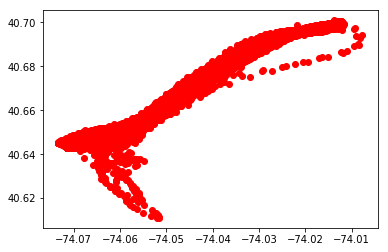

In [41]:
plt.plot(ais_sdf['latitude'], ais_sdf['longitude'], 'ro')
plt.show()

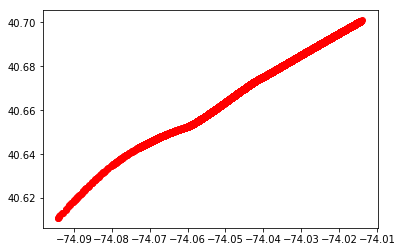

In [42]:
plt.plot(z[:,1], z[:,0], 'ro')
plt.show()

In [32]:
plotly.offline.plot({
    "data": [plotly.graph_objs.Scatter(x=z[:,0], y=z[:,1])]
})

'file://C:\\Users\\albe9057\\Documents\\GitHub\\AISFerryRouteDigitization_Prototype\\scripts\\prototype\\temp-plot.html'

In [34]:
ais_points = plotly.graph_objs.Scatter(
    x = ais_sdf['latitude'],
    y = ais_sdf['longitude'],
    name = 'ais'
)

In [43]:
lowess_trace = plotly.graph_objs.Scatter(
    x = z[:,1],
    y = z[:,0],
    name = 'lowess'
)

In [45]:
data = [ais_points, lowess_trace]
fig = dict(data=data)

In [46]:
plotly.plotly.iplot(fig, filename='lowess_01')

The draw time for this plot will be slow for clients without much RAM.


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [47]:
plotly.offline.plot(fig, filename='lowess_01')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `lowess_01` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\albe9057\\Documents\\GitHub\\AISFerryRouteDigitization_Prototype\\scripts\\prototype\\lowess_01.html'

# 3. Analyze and Model

#### P1. Convert AIS source dataset into format that can be passed into generalization function

#### P2. Run generalization function and visualize outputs

#### P3. Terminal Noise QC Process

#### P3A. Create manual checker for terminal noise QC process

#### P3B. Create automatic checker for terminal noise QC process

#### P4. Run terminal noise modifying function and repeat process at P3 until QC passed.

#### P5. Convert output generalization (+QC) output line to GIS format. Publish as a service. 